Cross-Validation Start Time:  2021-10-24 21:24:55
Starting cross-validation with distance metric:  euclidean
Finished Processing For k =  1
Confusion Matrix: 
 [[ 10.  25.  69.]
 [  6. 296. 334.]
 [ 17. 122. 421.]]
Precision:  0.43778278849033564
Accuracy:  0.5592307692307692
Recall:  0.6405134870146156
F1score:  0.5200904181545405


Finished Processing For k =  2
Confusion Matrix: 
 [[ 10.  25.  69.]
 [  6. 296. 334.]
 [ 17. 122. 421.]]
Precision:  0.43778278849033564
Accuracy:  0.5592307692307692
Recall:  0.6405134870146156
F1score:  0.5200904181545405


Finished Processing For k =  3
Confusion Matrix: 
 [[ 10.  62.  32.]
 [  3. 470. 163.]
 [ 17. 267. 276.]]
Precision:  0.442668233234271
Accuracy:  0.5815384615384616
Recall:  0.4223334723960506
F1score:  0.4322618345012915


Finished Processing For k =  4
Confusion Matrix: 
 [[ 10.  62.  32.]
 [  3. 470. 163.]
 [ 17. 267. 276.]]
Precision:  0.442668233234271
Accuracy:  0.5815384615384616
Recall:  0.4223334723960506
F1score:  0.432261

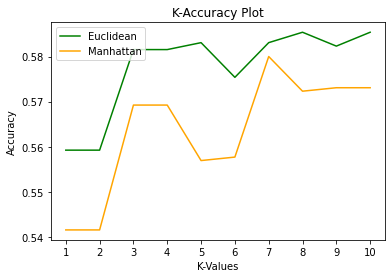

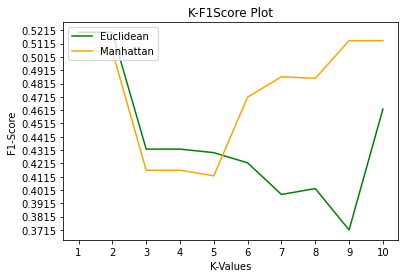

As evident from graphs, Suitable value of K for Euclidean: 2, Suitable value of K for Manhattan: 7..

 We will prefer F1 Count here while selecting appropriate value of K.
This is because data is skewed/imbalanced. Most of tweets are of negative nature.
Doing Testset Classification for Euclidean; K = 2
Finished Testset Classification for Distance Metric:  euclidean
Confusion Matrix: 
 [[ 6.  6. 26.]
 [ 2. 89. 74.]
 [ 2. 22. 99.]]
Precision:  0.5007222416721775
Accuracy:  0.5950920245398773
Recall:  0.7356125356125357
F1score:  0.5958540754519915


Doing Testset Classification for Manhattan; K = 7
Finished Testset Classification for Distance Metric:  manhattan
Confusion Matrix: 
 [[  3.  26.   9.]
 [  0. 137.  28.]
 [  0.  59.  64.]]
Precision:  0.47652520065870513
Accuracy:  0.6257668711656442
Recall:  0.6351351351351352
F1score:  0.5445150608877937




In [1]:
import re as re
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from datetime import datetime

positiveTweetsLabel=1
neutralTweetsLabel=0
negativeTweetsLabel=-1

stopWords = pd.read_csv('/home/abu-bakr/Documents/ML@LUMS/Assignment1/stop_words.txt', header=None)
appleSentimentTweetsData = pd.read_csv('/home/abu-bakr/Documents/ML@LUMS/Assignment1/AppleSentimentTweets.csv')
tweets = appleSentimentTweetsData['text']
sentiments = appleSentimentTweetsData['sentiment']
trainTweetsCount = int(len(tweets) * 0.8)
trainGoldLabels = sentiments[:trainTweetsCount].values
testGoldLabels = sentiments[trainTweetsCount:len(tweets)].values

processedTweets = []
vocabulary = []
trainFeatureMatrix = []
testFeatureMatrix = []

#----PreProcessing----#
def preprocessTweets():
    global tweets
    global processedTweets    
    for tweet in tweets:
        tweet = tweet.lower()
        tweet = cleanStopWordsFromTweet(tweet)
        processedTweets += [' '.join(re.findall('(?<![@a-zA-Z0-9])[A-Za-z]+', re.sub('http[s]*://[a-zA-Z0-9_.%/-]+','', tweet)))]

        
def cleanStopWordsFromTweet(tweet):
    for stopword in stopWords.iloc[:,0]:
        tweet = re.sub(rf'\b{stopword}\b', '', tweet)
    return tweet
#----PreProcessing----#

#----FeatureExtraction----#
def extractFeatures():
    generateVocabulary()
    initializeFeatureMatrices()
    
def generateVocabulary():
    #vocabulary consists of words only from train data####
    global vocabulary
    trainWords = {word for tweet in processedTweets[:trainTweetsCount-1] for word in tweet.split()}
    vocabulary = list(trainWords)

def initializeFeatureMatrices():
    global trainFeatureMatrix
    global testFeatureMatrix
    
    #trainFeatureMatrix with dimensions (training tweets * total vocabulary words)####
    trainFeatureMatrix = np.zeros((trainTweetsCount, len(vocabulary)), dtype = 'int8')
    #testFeatureMatrix with dimensions (totaltweets - trainingtweets * total vocabulary words)####
    testFeatureMatrix = np.zeros((len(tweets) - trainTweetsCount, len(vocabulary)), dtype = 'int8')

    populateFeatureMatrix(trainFeatureMatrix, 0, trainTweetsCount-1)
    populateFeatureMatrix(testFeatureMatrix, trainTweetsCount, len(processedTweets))
    
def populateFeatureMatrix(featureMatrix, startIndex, endindex):
    count = 0    
    for tweet in processedTweets[startIndex:endindex]:
        for word in tweet.split():
            if word in vocabulary:
                featureMatrix[count][vocabulary.index(word)] += 1
        count += 1
#----FeatureExtraction----#


#----KNN Classification----#

def performKNNClassification():

    crossValidationKValues = [1,2,3,4,5,6,7,8,9,10]
    validationDatasetLength = int(trainTweetsCount * 0.2)
    crossValidationFolds = 5
    
    print('Cross-Validation Start Time: ' , datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    euclideanKWiseAccuracyDict = {}
    euclideanKWiseF1scoreDict = {}
    #Cross Validate for Euclidean Distance Metric
    crossValidate(crossValidationKValues, validationDatasetLength, crossValidationFolds, 
                  euclideanKWiseAccuracyDict, euclideanKWiseF1scoreDict, "euclidean")
    
    manhattanKWiseAccuracyDict = {}
    manhattanKWiseF1scoreDict = {}
    #Cross Validate for Manhattan Distance Metric
    crossValidate(crossValidationKValues, validationDatasetLength, crossValidationFolds,
                  manhattanKWiseAccuracyDict, manhattanKWiseF1scoreDict, "manhattan")
    
    print('Cross-Validation End Time: ' , datetime.now().strftime('%Y-%m-%d %H:%M:%S'))
    
    plotAccuracyStats(crossValidationKValues, euclideanKWiseAccuracyDict, manhattanKWiseAccuracyDict)
    plotF1Stats(crossValidationKValues, euclideanKWiseF1scoreDict, manhattanKWiseF1scoreDict)
    
    print('As evident from graphs, Suitable value of K for Euclidean: 2, Suitable value of K for Manhattan: 7..')
    print('\n We will prefer F1 Count here while selecting appropriate value of K.')
    print('This is because data is skewed/imbalanced. Most of tweets are of negative nature.')
    
    print('Doing Testset Classification for Euclidean; K = 2')
    k = 2
    classifyTestData("euclidean", k)
    
    print('Doing Testset Classification for Manhattan; K = 7')
    k = 7
    classifyTestData("manhattan", k)
    
def crossValidate(crossValidationKValues, validationDatasetLength, crossValidationFolds,kWiseAccuracyDict,
                  kWiseF1scoreDict, distanceMetric):
    print('Starting cross-validation with distance metric: ' , distanceMetric)
    
    for k in crossValidationKValues:
        foldCounter = 0
        confusionMatrix = np.zeros(shape=(3,3))
        #Initial range for validation data split (0th row to 20pc/260 rows)
        validationStartIndex = 0
        validationEndIndex = 0 + validationDatasetLength #### initial validationDatasetLength: 20 pc of training data
        while(foldCounter < crossValidationFolds):
            #extracting gold lables for validation range from all training gold labels
            goldLabels = trainGoldLabels[validationStartIndex:validationEndIndex]
            #calculating distances between validation and training sets; result is, for each distance,..
            #..training points indices sorted from lowest distance to highest
            sortedDistanceIndicesMatrix = caculateValidationSetDistances(distanceMetric, validationStartIndex, validationEndIndex)
            #extract k lables from sorted distances matrix
            kPredictedLabels = predictKLabels(sortedDistanceIndicesMatrix, k)
            #predict classes on basis of most frequent class in k lables
            predictedClassLabels = predictClasses(kPredictedLabels, k)
            #generate confusion matrix; compare predicted and gold lables
            #also summing confusion matrix for each fold; end result will be one confusion matrix for each..
            #..value of k and distance metric
            confusionMatrix = confusionMatrix + calculateConfusionMatrix(predictedClassLabels, goldLabels)
            
            #increment validation data range start and end inde
            validationStartIndex = validationEndIndex
            validationEndIndex = validationEndIndex + validationDatasetLength
            
            #increment fold counter
            foldCounter += 1
            
        accuracy = calculateAccuracy(confusionMatrix)
        kWiseAccuracyDict[k] = accuracy
        
        precision = calculatePrecision(confusionMatrix)
        recall = calculateRecall(confusionMatrix)
        
        f1score = calculateF1Score(precision, recall)
        kWiseF1scoreDict[k] = f1score
        
        print('Finished Processing For k = ' , k)
        print('Confusion Matrix: \n', confusionMatrix)
        print('Precision: ', precision)
        print('Accuracy: ', accuracy)
        print('Recall: ', recall)
        print('F1score: ', f1score)
        print('\n')
            
def caculateValidationSetDistances(distanceMetric, validationStartIndex, validationEndIndex):
    #generate validation dataset from training feature matrix
    validationDataset = trainFeatureMatrix[validationStartIndex:validationEndIndex,:]
    #delete(this function not actually deletes but just ignores) validation data in training matrix..
    #..and get remainnig training data
    trainingDataset = np.delete(trainFeatureMatrix, np.s_[validationStartIndex:validationEndIndex], axis = 0)
    
    if distanceMetric == "euclidean":
        distanceMatrix = np.sqrt(np.sum((validationDataset[:,None] - trainingDataset) ** 2, axis = 2))
    elif distanceMetric == "manhattan":
        distanceMatrix = np.sum(abs(validationDataset[:,None] - trainingDataset), axis = 2)
    
    return distanceMatrix.argsort()

def predictKLabels(indicesMatrix, k):
    #return given k labels of training points having shortest distance with validation points
    return trainGoldLabels[indicesMatrix[:,0:k]]

def predictClasses(kPredictedLabels, k):
    #return most frequent class for each training-distance point from klables
    predictedClassLabels = np.empty(len(kPredictedLabels))
    loopIter = 0
    for kLabels in kPredictedLabels:
        kLabelsEndIndex = k
        while(True):
            values, counts = np.unique(kLabels[0:kLabelsEndIndex], return_counts = True)
            if(isTieExists(counts)):
                kLabelsEndIndex -= 1
            else:
                predictedClassLabels[loopIter] = values[np.argmax(counts)]
                loopIter += 1
                break
    return predictedClassLabels

def isTieExists(counts):
    return len(counts) != len(set(counts))
    
def calculateConfusionMatrix(predictedClassLabels, goldLabels):
    confusionMatrix = np.empty(shape=(3,3))
 
    positiveGoldLabelsDetails = getGoldLabelsDetails(predictedClassLabels, goldLabels, positiveTweetsLabel)
    confusionMatrix[0][0] = positiveGoldLabelsDetails.get(positiveTweetsLabel)
    confusionMatrix[0][1] = positiveGoldLabelsDetails.get(neutralTweetsLabel)
    confusionMatrix[0][2] = positiveGoldLabelsDetails.get(negativeTweetsLabel)
    
    neutralGoldLablesDetails = getGoldLabelsDetails(predictedClassLabels, goldLabels, neutralTweetsLabel)
    confusionMatrix[1][0] = neutralGoldLablesDetails.get(positiveTweetsLabel)
    confusionMatrix[1][1] = neutralGoldLablesDetails.get(neutralTweetsLabel)
    confusionMatrix[1][2] = neutralGoldLablesDetails.get(negativeTweetsLabel)
    
    negativeGoldLablesDetails = getGoldLabelsDetails(predictedClassLabels, goldLabels, negativeTweetsLabel)
    confusionMatrix[2][0] = negativeGoldLablesDetails.get(positiveTweetsLabel)
    confusionMatrix[2][1] = negativeGoldLablesDetails.get(neutralTweetsLabel)
    confusionMatrix[2][2] = negativeGoldLablesDetails.get(negativeTweetsLabel)
    
    confusionMatrix[np.isnan(confusionMatrix)] = 0
    return confusionMatrix

def getGoldLabelsDetails(predictedClassLabels, goldLabels, label):
    values, counts = np.unique(predictedClassLabels[np.where(goldLabels==label)[0]], return_counts = True)
    labelsDetails = dict(zip(values, counts))
    return labelsDetails

def calculateAccuracy(confusionMatrix):
    with np.errstate(divide='ignore', invalid='ignore'):
        return checkIsNaN((confusionMatrix[0][0] + confusionMatrix[1][1] + confusionMatrix[2][2]) / np.sum(confusionMatrix))

def calculatePrecision(confusionMatrix):
    with np.errstate(divide='ignore', invalid='ignore'):
        return checkIsNaN((((confusionMatrix[0][0] / np.sum(confusionMatrix[0,:])) + (confusionMatrix[1][1] / np.sum(confusionMatrix[1,:])) + (confusionMatrix[2][2] / np.sum(confusionMatrix[2,:]))) / 3))

def calculateRecall(confusionMatrix):
    with np.errstate(divide='ignore', invalid='ignore'):
        return checkIsNaN((((confusionMatrix[0][0] / np.sum(confusionMatrix[:,0])) + (confusionMatrix[1][1] / np.sum(confusionMatrix[:,1])) + (confusionMatrix[2][2] / np.sum(confusionMatrix[:,1]))) / 3))

def calculateF1Score(precision, recall):
    with np.errstate(divide='ignore', invalid='ignore'):
        return checkIsNaN((2 * precision * recall) / (precision + recall))

def checkIsNaN(value):    
    if np.isnan(value):
        return 0
    else:
        return value
    
def plotAccuracyStats(crossValidationKValues, euclideanKWiseAccuracyDict, manhattanKWiseAccuracyDict):

    y_euclidean = list(euclideanKWiseAccuracyDict.values())
    y_manhattan = list(manhattanKWiseAccuracyDict.values())
    
    plt.subplot(1, 1, 1)
    plt.plot(crossValidationKValues, y_euclidean, color='green')
    plt.plot(crossValidationKValues, y_manhattan, color='orange')
    plt.xticks(np.arange(min(crossValidationKValues), max(crossValidationKValues) + 1, 1))

    plt.xlabel('K-Values')
    plt.ylabel('Accuracy')
    plt.title('K-Accuracy Plot')
    plt.legend(['Euclidean', 'Manhattan'], loc ="upper left")
    plt.show() 
    
def plotF1Stats(crossValidationKValues, euclideanKWiseF1scoreDict, manhattanKWiseF1scoreDict):
    y_euclidean = list(euclideanKWiseF1scoreDict.values())
    y_manhattan = list(manhattanKWiseF1scoreDict.values())
        
    plt.subplot(1, 1, 1)
    plt.plot(crossValidationKValues, y_euclidean, color='green')
    plt.plot(crossValidationKValues, y_manhattan, color='orange')
    plt.xticks(np.arange(min(crossValidationKValues), max(crossValidationKValues) + 1, 1))
    plt.yticks(np.arange(min(y_euclidean), max(y_euclidean) + 0.01, 0.01))
    
    plt.xlabel('K-Values')
    plt.ylabel('F1-Score')
    plt.title('K-F1Score Plot')
    plt.legend(['Euclidean', 'Manhattan'], loc ="upper left")
    plt.show()

def classifyTestData(distanceMetric, k):
    sortedDistanceIndicesMatrix = caculateTestSetDistances(distanceMetric)
    kPredictedLabels = predictKLabels(sortedDistanceIndicesMatrix, k)
    predictedClassLabels = predictClasses(kPredictedLabels, k)
    confusionMatrix = calculateConfusionMatrix(predictedClassLabels, testGoldLabels)
    print('Finished Testset Classification for Distance Metric: ' , distanceMetric)
    print('Confusion Matrix: \n', confusionMatrix)
    
    accuracy = calculateAccuracy(confusionMatrix)
    precision = calculatePrecision(confusionMatrix)
    recall = calculateRecall(confusionMatrix)
    f1score = calculateF1Score(precision, recall)

    print('Precision: ', precision)
    print('Accuracy: ', accuracy)
    print('Recall: ', recall)
    print('F1score: ', f1score)
    print('\n')
    
def caculateTestSetDistances(distanceMetric):    
    if distanceMetric == "euclidean":
        distanceMatrix = np.sqrt(np.sum((testFeatureMatrix[:,None] - trainFeatureMatrix) ** 2, axis = 2))
    elif distanceMetric == "manhattan":
        distanceMatrix = np.sum(abs(testFeatureMatrix[:,None] - trainFeatureMatrix), axis = 2)
    
    return distanceMatrix.argsort()    
#----KNN Classification----#    


preprocessTweets()
extractFeatures()
performKNNClassification()

For value of k:  1  and distance metric:  euclidean
Confusion Matrix: 
 [[231 322  10]
 [ 17 612   7]
 [  7  81  17]]
Accuracy:  0.6595092024539877
Precision:  0.669612672655269
Recall:  0.5114902888889953
F1Score:  0.5169217866463339


For value of k:  2  and distance metric:  euclidean
Confusion Matrix: 
 [[338 224   1]
 [111 525   0]
 [ 25  77   3]]
Accuracy:  0.6641104294478528
Precision:  0.6995577963717848
Recall:  0.48479945549049736
F1Score:  0.4750401834354885


For value of k:  3  and distance metric:  euclidean
Confusion Matrix: 
 [[270 287   6]
 [ 90 546   0]
 [ 25  77   3]]
Accuracy:  0.6280674846625767
Precision:  0.5448773448773448
Recall:  0.45554523562164567
F1Score:  0.4428635904366185


For value of k:  4  and distance metric:  euclidean
Confusion Matrix: 
 [[391 168   4]
 [203 433   0]
 [ 44  60   1]]
Accuracy:  0.6326687116564417
Precision:  0.48930691441516205
Recall:  0.4616117342968109
F1Score:  0.445666853831086




/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

For value of k:  5  and distance metric:  euclidean
Confusion Matrix: 
 [[343 220   0]
 [161 475   0]
 [ 45  60   0]]
Accuracy:  0.6273006134969326
Precision:  0.4179704620481952
Recall:  0.45203052679006966
F1Score:  0.4332894575784376


For value of k:  6  and distance metric:  euclidean
Confusion Matrix: 
 [[390 173   0]
 [216 420   0]
 [ 54  49   2]]
Accuracy:  0.6226993865030674
Precision:  0.7483715661285754
Recall:  0.45738085396921146
F1Score:  0.44414537787583547


For value of k:  7  and distance metric:  euclidean
Confusion Matrix: 
 [[367 195   1]
 [191 445   0]
 [ 50  54   1]]
Accuracy:  0.6234662576687117
Precision:  0.5816095985641336
Recall:  0.4536914509986663
F1Score:  0.43822640313882383


For value of k:  8  and distance metric:  euclidean
Confusion Matrix: 
 [[403 160   0]
 [212 424   0]
 [ 51  53   1]]
Accuracy:  0.6349693251533742
Precision:  0.7569083997655426
Recall:  0.46399954890185796
F1Score:  0.4469428772967941


For value of k:  9  and distance metric:  e

/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/home/abu-bakr/anaconda3/envs/ML@LUMS/lib/python3.7/site-packages/sklearn/metrics/_classification.py:1248: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start,

For value of k:  5  and distance metric:  manhattan
Confusion Matrix: 
 [[325 238   0]
 [160 476   0]
 [ 38  67   0]]
Accuracy:  0.6142638036809815
Precision:  0.41029664865605947
Recall:  0.4418974421990609
F1Score:  0.42345620768247355


For value of k:  6  and distance metric:  manhattan
Confusion Matrix: 
 [[380 182   1]
 [196 440   0]
 [ 43  60   2]]
Accuracy:  0.6303680981595092
Precision:  0.6419071111342726
Recall:  0.46194237114844366
F1Score:  0.44923111362545565


For value of k:  7  and distance metric:  manhattan
Confusion Matrix: 
 [[362 199   2]
 [173 463   0]
 [ 43  61   1]]
Accuracy:  0.6334355828220859
Precision:  0.5333393954766839
Recall:  0.4601650817056829
F1Score:  0.44481100056744366


For value of k:  8  and distance metric:  manhattan
Confusion Matrix: 
 [[389 173   1]
 [210 426   0]
 [ 55  48   2]]
Accuracy:  0.6265337423312883
Precision:  0.6399637943176931
Recall:  0.4599334417458349
F1Score:  0.44679417890549783


For value of k:  9  and distance metric:  

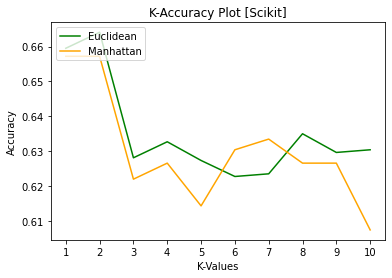

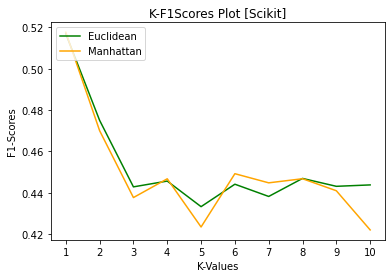

As evident from graphs, Suitable value of K for Euclidean and Manhattan: 2 

For Distance Metric:  euclidean
Accuracy:  0.696319018404908
Precision:  0.8182893180922349
Recall:  0.5331907003280559
F1Score:  0.539614357438219


For Distance Metric:  manhattan
Accuracy:  0.6932515337423313
Precision:  0.818588160172069
Recall:  0.5297908481477159
F1Score:  0.5360961200142206




In [2]:
####IMPORTANT: Execute cells in order; pre-processed data is required here from step 1####


from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import cross_val_predict
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report
from sklearn import metrics

crossValidationKValues = [1,2,3,4,5,6,7,8,9,10]
euclideanAccuracies = []
euclideanF1Scores = []
manhattanAccuracies = []
manhattanF1Scores = []

def crossValidateUsingScikit(distanceMetric, accuracies, f1scores):
    for k in crossValidationKValues:
        knn = KNeighborsClassifier(n_neighbors = k, metric = distanceMetric)
        predictedSentiments = cross_val_predict(knn, trainFeatureMatrix, trainGoldLabels, cv = 5)
        confusionMatrix = confusion_matrix(trainGoldLabels, predictedSentiments)
        classificationReport = classification_report(trainGoldLabels, predictedSentiments, output_dict=True)
        print('For value of k: ', k, ' and distance metric: ' , distanceMetric)
        print('Confusion Matrix: \n', confusionMatrix)
        print('Accuracy: ', classificationReport.get('accuracy'))
        accuracies.append(classificationReport.get('accuracy'))
        print('Precision: ', classificationReport.get('macro avg').get('precision'))
        print('Recall: ', classificationReport.get('macro avg').get('recall'))
        print('F1Score: ', classificationReport.get('macro avg').get('f1-score'))
        f1scores.append(classificationReport.get('macro avg').get('f1-score'))
        print('\n')

def plotStats(crossValidationKValues, euclideanList, manhattanList, xlabel, ylabel, title):
    plt.subplot(1, 1, 1)
    plt.plot(crossValidationKValues, euclideanList, color='green')
    plt.plot(crossValidationKValues, manhattanList, color='orange')
    plt.xticks(np.arange(min(crossValidationKValues), max(crossValidationKValues) + 1, 1))

    plt.xlabel(xlabel)
    plt.ylabel(ylabel)
    plt.title(title)
    plt.legend(['Euclidean', 'Manhattan'], loc ="upper left")
    plt.show() 

def classifyTestInstancesUsingScikit(distanceMetric, k):
    knn = KNeighborsClassifier(n_neighbors = k, metric = distanceMetric)
    knn.fit(trainFeatureMatrix, trainGoldLabels)
    predictedSentiments = knn.predict(testFeatureMatrix)
    
    classificationReport = classification_report(testGoldLabels, predictedSentiments, output_dict=True)
    print('For Distance Metric: ' , distanceMetric)
    print('Accuracy: ', classificationReport.get('accuracy'))
    print('Precision: ', classificationReport.get('macro avg').get('precision'))
    print('Recall: ', classificationReport.get('macro avg').get('recall'))
    print('F1Score: ', classificationReport.get('macro avg').get('f1-score'))
    print('\n')

crossValidateUsingScikit('euclidean', euclideanAccuracies, euclideanF1Scores)
crossValidateUsingScikit('manhattan', manhattanAccuracies, manhattanF1Scores)

plotStats(crossValidationKValues, euclideanAccuracies, manhattanAccuracies, 'K-Values', 'Accuracy', 'K-Accuracy Plot [Scikit]')
plotStats(crossValidationKValues, euclideanF1Scores, manhattanF1Scores, 'K-Values', 'F1-Scores', 'K-F1Scores Plot [Scikit]')

print('As evident from graphs, Suitable value of K for Euclidean and Manhattan: 2', '\n')
classifyTestInstancesUsingScikit('euclidean', 2)
classifyTestInstancesUsingScikit('manhattan', 2)